# Praca domowa 2
**Piotr Marciniak**

## Pakiety

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)

## Wczytanie danych

In [2]:
data = pd.read_csv('https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1')
data.head(10)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
5,5,2016-04-03 16:31:01,4790991674,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,"Odzież, Obuwie, Dodatki"
6,6,2016-04-03 17:56:11,4790991674,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,"Odzież, Obuwie, Dodatki"
7,7,2016-04-03 11:58:55,4824025074,"['Biżuteria i Zegarki', 'Zegarki', 'Dziecięce']",1,1,handel_barbo,28.99,1,886,0,4287,Legionowo,Biżuteria i Zegarki
8,8,2016-04-03 18:18:37,4826332874,"['RTV i AGD', 'AGD drobne', 'Higiena i pielęgn...",1,1,jupiter2009,12.00,0,49,0,5403,zachodniopomorskie,RTV i AGD
9,9,2016-04-03 22:56:56,4828603874,"['RTV i AGD', 'Kamery', 'Zasilanie', 'Zasilacze']",1,1,e-trade-com-pl,45.00,1,4,0,15561,Warszawa,RTV i AGD


In [3]:
print(data.columns)
print(data.shape)

Index(['lp', 'date', 'item_id', 'categories', 'pay_option_on_delivery',
       'pay_option_transfer', 'seller', 'price', 'it_is_allegro_standard',
       'it_quantity', 'it_is_brand_zone', 'it_seller_rating', 'it_location',
       'main_category'],
      dtype='object')
(420020, 14)


In [4]:
X = data.iloc[:, data.columns != 'price']
y = data.iloc[:, data.columns == 'price']

In [5]:
X.columns

Index(['lp', 'date', 'item_id', 'categories', 'pay_option_on_delivery',
       'pay_option_transfer', 'seller', 'it_is_allegro_standard',
       'it_quantity', 'it_is_brand_zone', 'it_seller_rating', 'it_location',
       'main_category'],
      dtype='object')

In [6]:
y.columns

Index(['price'], dtype='object')

# Kodowanie zmiennych kategorycznych
## Target encoding
Target encoding dla zmiennej **it_location**

In [7]:
data[['it_location']]

,it_location
0,Warszawa
1,Warszawa
2,Leszno
3,Wola Krzysztoporska
4,BIAŁYSTOK
...,...
420015,Kraśnik
420016,Dzierżoniów
420017,Supraśl
420018,Poznań


In [8]:
import category_encoders as ce
target_encoder = ce.TargetEncoder(cols=['it_location'])
df_target = target_encoder.fit_transform(X, y)
df_target[['it_location']]

,it_location
0,85.423398
1,85.423398
2,61.990914
3,35.433365
4,117.191956
...,...
420015,24.306929
420016,66.785334
420017,18.682800
420018,106.203076


In [9]:
print(f"Unikalne w pierwotnej ramce {X.it_location.unique().size}, a w ramce po przekształceniu {df_target.it_location.unique().size}")

Unikalne w pierwotnej ramce 10056, a w ramce po przekształceniu 6283


Target encoding ma przewagę nad one-hot-encoding. Zamiana kolumny kategorycznej najczęściej stringa na kolumnę liczbową nie jest tak pamięciożerne jak zamiana stringa na macierz zer i jedynek (One Hot Encoding). W przypadku prób zakodowania wszystkich wartości kolumny **it_location** one-hot-enkoderem potrzebowalibyśmy dodatkowe 32 GiB pamięci (poniżej obliczenia). Zatem najczęściej ucieklibyśmy się do zebrania wszystkich rzadko występujących lokacji jako reszta, co de facto powodowałoby utratę części informacji, może niektóre rzadko występujące lokacje wyróżniałyby się jakoś pod względem ceny (**price**). Dla niektórych algorytmów uczenia trzeba będzie nasz target encoder jeszcze znormalizować, ponieważ zakres wartości wydaję się dosyć spory. Dlatego przy 

In [10]:
10055*8*420020/1024**3 # np.float64 - 8 bajtow, 420020 wierszy, 10055 nowych kolumn, 1024^3 GiB

31.46604523062706

## Inne Encodingi
### One Hot Encoding
Teraz zastosujemy one hot encoding dla kolumny **main_category**. Zacznijmy od **One Hot Encoding**.


In [11]:
one_hot_encoder = ce.OneHotEncoder(cols="main_category")
df_one = one_hot_encoder.fit_transform(X, y)

In [12]:
only_hot = df_one.filter(regex='main_category')
only_hot

,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,main_category_9,main_category_10,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420016,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
420017,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420018,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


One hot encoding jest dosyć pamięciożernym encoderem. Poniżej sprawdzimy, jak dużo pamięci on zajmuje.

In [13]:
mem_hot = only_hot.memory_usage(deep=True).sum()
mem_hot

90724448

### Count encoder

In [14]:
count_encoder = ce.CountEncoder(cols="main_category")
df_count = count_encoder.fit_transform(X, y)

In [15]:
only_count = df_count.filter(regex="main_category")
only_count

,main_category
0,14491
1,54257
2,91042
3,11572
4,54257
...,...
420015,20341
420016,28096
420017,54257
420018,42107


In [16]:
mem_count = only_count.memory_usage(deep=True).sum()
mem_count

3360288

### Binary encoder

In [17]:
binary_encoder = ce.BinaryEncoder(cols="main_category")
df_binary = binary_encoder.fit_transform(X, y)

In [18]:
only_binary = df_binary.filter(regex="main_category")
only_binary

,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
420015,0,0,0,1,1,0
420016,0,0,1,0,0,1
420017,0,0,0,0,1,0
420018,0,0,1,0,0,0


In [19]:
mem_binary = only_binary.memory_usage(deep=True).sum()
mem_binary

20161088

## Porównanie
Jak widzimy z podanych trzech encodingów najmniej pamięciożernym jest **Count Encoding**, potem mamy **Binary Encoding**, najbardziej pamięciożernym encoderem jest **One Hot Encoding**. </br>
* **Count Encoding** przypisuje zmiennym ilości ich występowania. 
* **Binary encoding** zapisuje nasze unikalne wartości w kolumnach jako liczbę binarną.
* **One Hot Encoding** tworzy nam macierz, gdzie kolumny odpowiadają unikalnym wartościom w kolumnie. Zapisuje 1, gdy dana wartości w występuje w kolumnie, gdy nie 0.


In [20]:
pd.DataFrame({"Encoding": ["Binary Encoding", "Count Encoding", "One Hot Encoding"],
             "Memory Usage": [mem_binary, mem_count, mem_hot]})

,Encoding,Memory Usage
0,Binary Encoding,20161088
1,Count Encoding,3360288
2,One Hot Encoding,90724448


# Uzupełnianie braków

In [21]:
reduced_df = data[["it_seller_rating", "it_quantity", "price"]]
reduced_df

,it_seller_rating,it_quantity,price
0,50177,997,59.99
1,12428,9288,4.90
2,7389,895,109.90
3,15006,971,18.50
4,32975,950,19.90
...,...,...,...
420015,176,0,180.00
420016,34851,2,14.99
420017,983,470,5.99
420018,163,0,200.00


## Pierwszy eksperyment

In [22]:
import math
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.metrics import mean_squared_error


first_experiment = []

for i in range(10):
    modf_df = reduced_df.copy(deep=True)
    random_i = np.random.choice(reduced_df.index, size=math.ceil(0.1*modf_df.shape[0]), replace=False) #losujemy 10% indeksów
    modf_df.loc[random_i, "it_seller_rating"] = np.nan
    imputer = IterativeImputer()
    approx_X = imputer.fit_transform(modf_df.values)
    first_experiment.append(mean_squared_error(reduced_df.values, approx_X, squared=False))
    

In [23]:
first_experiment = np.array(first_experiment)
print(f"Średnia: {np.mean(first_experiment)}, Odchylenie standardowe {np.std(first_experiment)}")

Średnia: 3861.895814849447, Odchylenie standardowe 25.004898456857074


## Drugi eksperyment

In [24]:
second_experiment = []

for i in range(10):
    modf_df = reduced_df.copy(deep=True)
    random_i = np.random.choice(reduced_df.index, size=(2, math.ceil(0.1*modf_df.shape[0])), replace=False)
    modf_df.loc[random_i[0], "it_seller_rating"] = np.nan
    modf_df.loc[random_i[1], "it_quantity"] = np.nan
    imputer = IterativeImputer()
    approx_X = imputer.fit_transform(modf_df.values)
    second_experiment.append(mean_squared_error(reduced_df.values, approx_X, squared=False))
    

In [25]:
second_experiment = np.array(second_experiment)
print(f"Średnia: {np.mean(second_experiment, axis=0)}, Odchylenie standardowe {np.std(second_experiment, axis=0)}")

Średnia: 6330.346938001617, Odchylenie standardowe 40.04676689069674


## Nearest Neigbhours
W tej wersji użyje Nearest Neigbhours Imputation, niestety ze względów wydajnościowych zrobię to na ramce o mniejszej ilości rekordów, ponieważ zrobienie tego na pełne ramce uniemożliwiłoby oddanie tej pracy domowej na czas. Z tego powodu nie zamierzam porównywać tych wyników z poprzednimi eksperymentami.

In [26]:
size = 50000
random_i = np.random.choice(reduced_df.index, size=50000, replace=False)
new_data = reduced_df.iloc[random_i, :].reset_index(drop=True)
new_data

,it_seller_rating,it_quantity,price
0,53,4,39.00
1,4099,1,4.40
2,49581,888,79.90
3,91774,7787,5.90
4,9545,0,13.20
...,...,...,...
49995,891,9,20.00
49996,3266,98150,79.99
49997,20152,20,103.99
49998,11880,99211,24.00


#### Pierwszy eksperyment

In [27]:
nearest_first_exp = []
for i in range(10):
    modf_df = new_data.copy(deep=True)
    random_i = np.random.choice(new_data.index, size=math.ceil(size*0.1), replace=False) #losujemy 10% indeksów
    modf_df.loc[random_i, "it_seller_rating"] = np.nan
    imputer = KNNImputer()
    approx_X = imputer.fit_transform(modf_df.values)
    nearest_first_exp.append(mean_squared_error(new_data.values, approx_X, squared=False))
    

In [28]:
nearest_first_exp = np.array(nearest_first_exp)
print(f"Średnia: {np.mean(nearest_first_exp)}, Odchylenie standardowe {np.std(nearest_first_exp)}")

Średnia: 4072.6799275174553, Odchylenie standardowe 118.6165526962617


#### Drugi eksperyment

In [29]:
nearest_second_exp = []
for i in range(10):
    modf_df = new_data.copy(deep=True)
    random_i = np.random.choice(new_data.index, size=(2, math.ceil(size*0.1)), replace=False) #losujemy 10% indeksów
    modf_df.loc[random_i[0], "it_seller_rating"] = np.nan
    modf_df.loc[random_i[1], "it_quantity"] = np.nan
    imputer = KNNImputer()
    approx_X = imputer.fit_transform(modf_df.values)
    nearest_second_exp.append(mean_squared_error(new_data.values, approx_X, squared=False))

In [30]:
nearest_second_exp = np.array(nearest_second_exp)
print(f"Średnia: {np.mean(nearest_second_exp)}, Odchylenie standardowe {np.std(nearest_second_exp)}")

Średnia: 6871.984746132545, Odchylenie standardowe 106.11442934826351


## Podsumowanie

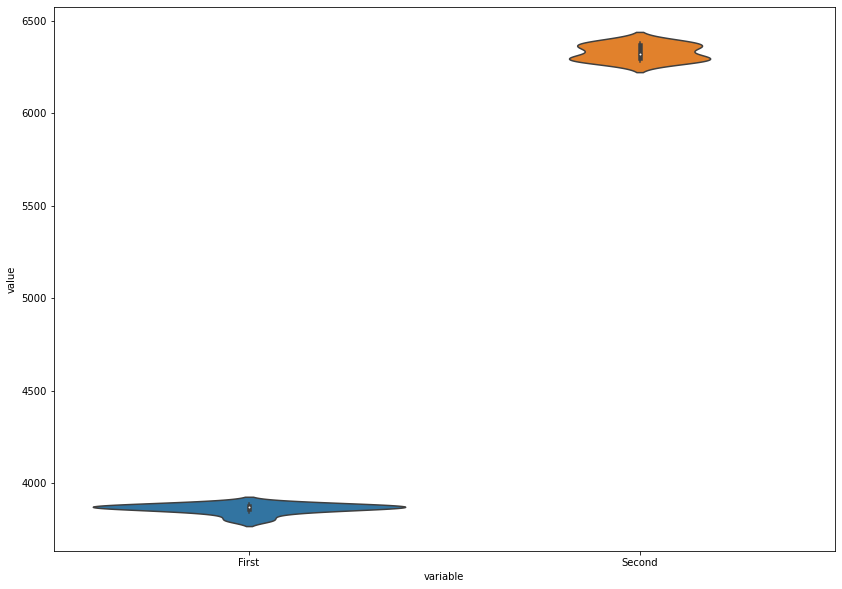

In [31]:
plot_df = pd.DataFrame({"First": first_experiment, "Second" : second_experiment}).melt(value_vars=["First", "Second"])
plt.figure(figsize=(14,10))
sns.violinplot(data=plot_df, x="variable", y="value")
plt.show()

Widzimy, że przy pierwszym eksperymencie rozkład RMSE wartości jest dosyć wąski, zatem wybór 10% elementów nie ma większego wpływu. Przy drugim podejściu rozkład jest trochę szerszy (niewiele) wynika to zapewne z tego, że usunęliśmy de facto więcej informacji o naszej próbce. Jeszcze gwoli ścisłości zajmijmy się Nearest Neighbours.

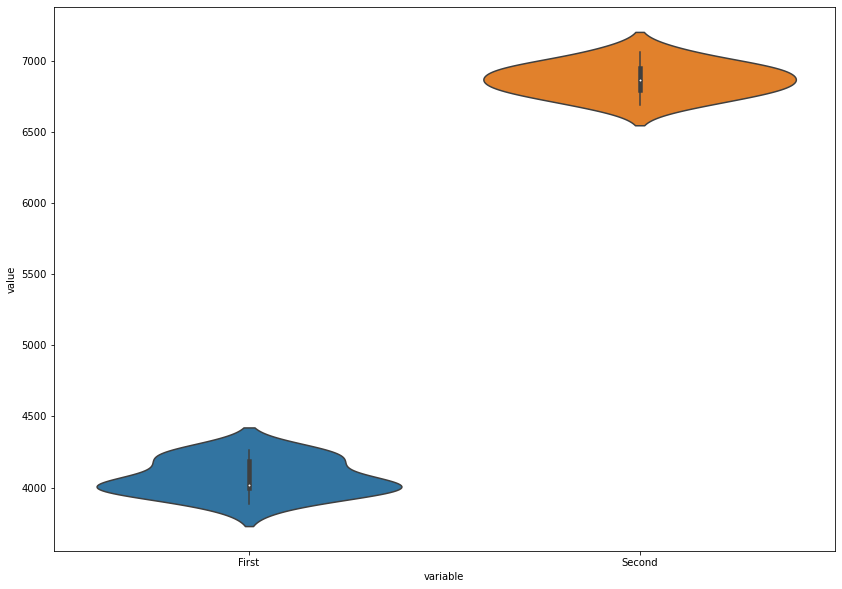

In [32]:
plot_df = pd.DataFrame({"First": nearest_first_exp, "Second": nearest_second_exp}).melt(value_vars=["First", "Second"])
plt.figure(figsize=(14,10))
sns.violinplot(data=plot_df, x="variable", y="value")
plt.show()

Widzimy, że rozkład wartości w przypadku Nearest Neigbhours jest znacznie szerszy w porównaniu, co wynika zapewne z mniejszego podzbioru, ale pomimo mniejszego 8-krotnie zbioru otrzymane wyniki są niewiele gorsze.
